In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, date
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error, r2_score
import numpy as np
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# Load Data
* Handle missing values, duplicated values, outlier

In [100]:
total = pd.read_csv("https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/data_preparation/merged_data/data_preparation.csv")
total['Date'] = pd.to_datetime(total['Date'])

df = total.set_index('Date')
df.head()

,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,RUT,silver,SP500,VIX
Date,,,,,,,,,,,,,,,
2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,1760.71,23.285,4358.34,14.91
2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,1760.71,23.285,4358.34,14.91
2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,1760.71,23.285,4358.34,14.91
2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,1760.71,23.285,4358.34,14.91
2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,1760.71,23.285,4358.34,14.91


In [101]:
df.shape

(3523, 15)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3523 entries, 2023-11-03 to 2010-04-01
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GOLD_open   3523 non-null   float64
 1   GOLD_high   3523 non-null   float64
 2   GOLD_low    3523 non-null   float64
 3   GOLD_close  3523 non-null   float64
 4   copper      3523 non-null   float64
 5   crude_oil   3523 non-null   float64
 6   DXY         3523 non-null   float64
 7   EURUSD      3523 non-null   float64
 8   MSCI        3523 non-null   float64
 9   NASDAQ      3523 non-null   float64
 10  NLR         3523 non-null   float64
 11  RUT         3523 non-null   float64
 12  silver      3523 non-null   float64
 13  SP500       3523 non-null   float64
 14  VIX         3523 non-null   float64
dtypes: float64(15)
memory usage: 440.4 KB


In [103]:
df.describe()

,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,RUT,silver,SP500,VIX
count,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.00000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000
mean,1498.371615,1508.886233,1487.146636,1498.115754,3.258305,71.932861,91.70528,1.193561,195.369728,7062.869659,52.293480,1356.510312,21.664682,2570.406898,18.557258
std,275.879422,278.063719,273.265368,275.540407,0.665505,21.999875,9.20311,0.113284,189.197959,3957.994311,7.821911,445.281716,6.241873,1068.216056,7.091908
min,1051.500000,1062.700000,1045.400000,1049.600000,1.943500,11.570000,72.93000,0.959600,25.590000,2091.790000,34.080000,590.030000,11.772000,1022.580000,9.140000
25%,1258.350000,1267.000000,1251.800000,1258.300000,2.719500,52.590000,81.91000,1.103750,39.495000,3681.110000,47.820000,1027.275000,16.833000,1690.375000,13.720000
50%,1395.200000,1410.300000,1384.200000,1396.200000,3.204500,72.670000,93.99000,1.165900,95.300000,5838.580000,50.640000,1347.200000,19.830000,2348.690000,16.810000
75%,1755.200000,1768.000000,1741.050000,1754.200000,3.718250,91.145000,97.88000,1.297400,359.290000,10640.875000,54.680000,1669.145000,24.791000,3371.570000,21.340000
max,2076.400000,2089.200000,2049.000000,2069.400000,4.937500,123.700000,114.10000,1.483100,675.150000,16057.440000,82.350000,2442.740000,48.599000,4796.560000,82.690000


<Axes: >

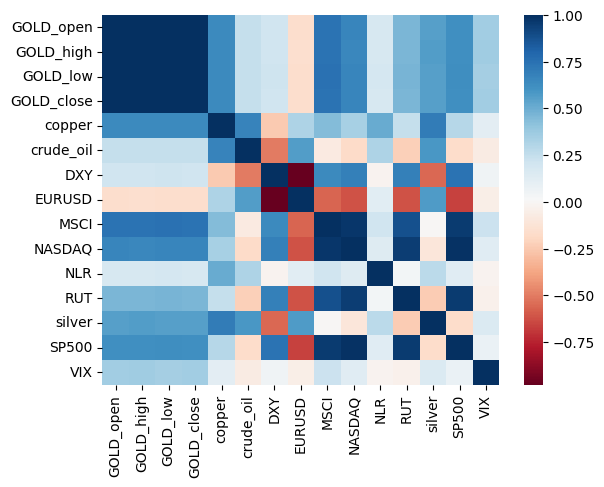

In [104]:
sns.heatmap(df.corr(), cmap="RdBu")

# Slpit Data (Testing, Training Data Sets)

In [105]:
from datetime import datetime

for index in total.index:
    total.loc[index, "Date"] = datetime.strptime(str(total.loc[index, "Date"])[:10], '%Y-%m-%d').date()

Start_day = date(2010,3,31)
Test_day = date(2021,11,16)
End_day = date(2023,11,3)


# train, test
total = total[(total["Date"] >= Start_day) & (total["Date"] <= End_day)].reset_index(drop = True)
train_dataset = total[total["Date"] < Test_day].reset_index(drop = True)
test_dataset = total[total["Date"] >= Test_day].reset_index(drop = True)


In [106]:
total.shape

(3523, 16)

In [107]:
X_train_valid = train_dataset.drop(["Date", "GOLD_close"], axis=1)[:-1]
y_train_valid = train_dataset["GOLD_close"][1:].reset_index(drop=True)

start_valid = date(2010,3, 31)
valid_day = date(2019,10,16)
end_valid = date(2021,11,16)

train_valid = total[(total["Date"] >= start_valid) & (total["Date"] <= end_valid)].reset_index(drop = True)
train_val = train_valid[train_valid["Date"] < valid_day].reset_index(drop = True)
valid_val = train_valid[train_valid["Date"] >= valid_day].reset_index(drop = True)

X_train = train_val.drop(["Date", "GOLD_close"], axis=1)[:-1]
y_train = train_val["GOLD_close"][1:].reset_index(drop=True)

X_valid = valid_val.drop(["Date", "GOLD_close"], axis=1)[:-1]
y_valid = valid_val["GOLD_close"][1:].reset_index(drop=True)

X_test = test_dataset.drop(["Date", "GOLD_close"], axis=1)[:-1]
y_test = test_dataset["GOLD_close"][1:].reset_index(drop=True)

In [108]:
test_ratio = len(test_dataset) / len(total)
valid_ratio = len(valid_val) / len(train_valid)

print("Tỉ lệ test_data/total:", test_ratio)
print("Tỉ lệ valid_data/train_valid:", valid_ratio)

Tỉ lệ test_data/total: 0.16378086857791654
Tỉ lệ valid_data/train_valid: 0.17882592466915506


In [109]:
print("Training_Valid Features Shape:", X_train_valid.shape)
print("Training_Valid Labels Shape:", y_train_valid.shape)

print("Train Features Shape:", X_train.shape)
print("Train Labels Shape:", y_train.shape)

print("Valid Features Shape:", X_valid.shape)
print("Valid Labels Shape:", y_valid.shape)

print("Testing Features Shape:", X_test.shape)
print("Testing Labels Shape:", y_test.shape)

Training_Valid Features Shape: (2945, 14)
Training_Valid Labels Shape: (2945,)
Train Features Shape: (2419, 14)
Train Labels Shape: (2419,)
Valid Features Shape: (526, 14)
Valid Labels Shape: (526,)
Testing Features Shape: (576, 14)
Testing Labels Shape: (576,)


In [110]:
print('{:0.1f} years of data in the training set'.format(X_train_valid.shape[0] / 365.))
print('{:0.1f} years of data in the test set'.format(X_test.shape[0] / 365.))

8.1 years of data in the training set
1.6 years of data in the test set


# Load Model

In [111]:
#import sklearn modules
import time
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

### Examine the Default Random Forest to Determine Parameters


1. We will use these parameters as a starting point. 
2. Based on sklearn's random forest documentation, I determined what features to change and what options are available.

In [112]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


### Random Search with Cross Validation

In [113]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 14, num = 7)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [2, 4, 6, 8, 10, 12, 14, None],
 'max_features': ['log2', 'sqrt', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [114]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 timeseriessplit
tscv = TimeSeriesSplit(n_splits=3)

# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = tscv, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

In [115]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 8,
 'bootstrap': True}

#### Top 10 best_params_

In [116]:
import numpy as np

from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier


# Utility function to report best scores
def report(results, n_top=10):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

In [117]:
print((len(rf_random.cv_results_["params"])))
report(rf_random.cv_results_)

100
Model with rank: 1
Mean validation score: -24.213 (std: 11.199)
Parameters: {'n_estimators': 900, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 8, 'bootstrap': True}

Model with rank: 2
Mean validation score: -24.286 (std: 11.093)
Parameters: {'n_estimators': 900, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'bootstrap': True}

Model with rank: 3
Mean validation score: -24.343 (std: 11.144)
Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 8, 'bootstrap': True}

Model with rank: 4
Mean validation score: -24.434 (std: 10.835)
Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'bootstrap': True}

Model with rank: 5
Mean validation score: -24.979 (std: 9.409)
Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 6, 

### Evaluation Function

In [118]:
y_test = np.array(y_test)

def ACC(model, X_test, y_test, X_train_valid, y_train_valid):    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train_valid)
    
    print('Model Performance')
    print(30*'*')
    print("Test accuracy for train set")
    #RMSE
    print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_train_valid, y_train_pred)))

    #MAPE
    print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_train_valid,y_train_pred))
    print()
    

    print("Test accuracy for test set")
    #RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("Root Mean Square Error (RMSE):", rmse)

    #MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(" Mean Absolute Percentage Error (MAPE):", mape)
    print()
    
    #R2
    print("R2 score:", r2_score(y_test,y_pred))
    print()
    
    sns.displot(y_test - y_pred, kde=True)
    plt.xlabel('y_test - y_pred')
    plt.ylabel('count')
    plt.show()
    
    print()
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('y_test')
    plt.ylabel('Predicted')
    plt.show()
    
    print()
    fig, ax = plt.subplots(1, 1, figsize=(14, 5))
    ax.plot(y_test, color = 'red', label="GOLD Price")
    ax.plot(y_pred, color = 'green', label="Predicted GOLD Price", linestyle="dashed")
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # .3f
    plt.title("Random Forest Regression")
    plt.legend()
    plt.show()
    
    print()
    
def AUC(model, X_valid, y_valid, X_train, y_train):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_valid)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_valid, y_val_pred))

    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    val_mape = mean_absolute_percentage_error(y_valid, y_val_pred)
    
    print('Model Performance')
    print(30*'*')
    print("Test accuracy for train set")
    #RMSE
    print("Root Mean Square Error (RMSE):", train_rmse)

    #MAPE
    print("Mean Absolute Percentage Error (MAPE):", train_mape)
    print()
    

    print("Test accuracy for valid set")
    #RMSE
    print("Root Mean Square Error (RMSE):", val_rmse)

    #MAPE
    print(" Mean Absolute Percentage Error (MAPE):", val_mape)
    print()
    
    #R2
    print("R2 score:", r2_score(y_valid,y_val_pred))
    print()
    
    sns.displot(y_valid - y_val_pred, kde=True)
    plt.xlabel('y_valid - y_pred')
    plt.ylabel('count')
    plt.show()
    
    print()
    sns.scatterplot(x=y_valid, y=y_val_pred)
    plt.xlabel('y_valid')
    plt.ylabel('Predicted')
    plt.show()
    
    print()
    fig, ax = plt.subplots(1, 1, figsize=(14, 5))
    ax.plot(y_valid, color = 'red', label="GOLD Price")
    ax.plot(y_val_pred, color = 'green', label="Predicted GOLD Price", linestyle="dashed")
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # .3f
    plt.title("Random Forest Regression")
    plt.legend()
    plt.show()
    
    print()

    train_valid['Date'] = pd.to_datetime(train_valid['Date'][:-1])
    test_dataset['Date'] = pd.to_datetime(test_dataset['Date'][:len(y_valid)])

    fig, ax = plt.subplots(figsize=(25, 5))

    ax.plot(train_valid['Date'][:-1], train_valid['GOLD_close'][1:], color='blue', label="Training Data")
    ax.plot(valid_val['Date'][:-1], y_valid, color='orange', label="Validation Data")
    ax.plot(valid_val['Date'][:-1], y_val_pred, color='green', label="Predicted GOLD Price", linestyle="dashed")
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) # Format the y-axis
    plt.legend()
    plt.show()


### Evaluate the Default Model

Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 2.353088712802501
Mean Absolute Percentage Error (MAPE): 0.001072664380862958

Test accuracy for valid set
Root Mean Square Error (RMSE): 30.509069426981576
 Mean Absolute Percentage Error (MAPE): 0.008177067955544721

R2 score: 0.9513987017543577



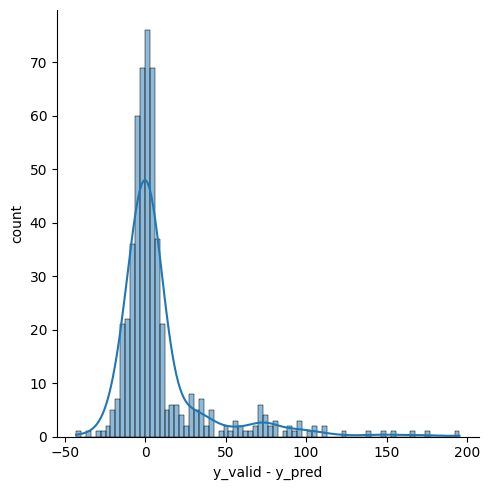

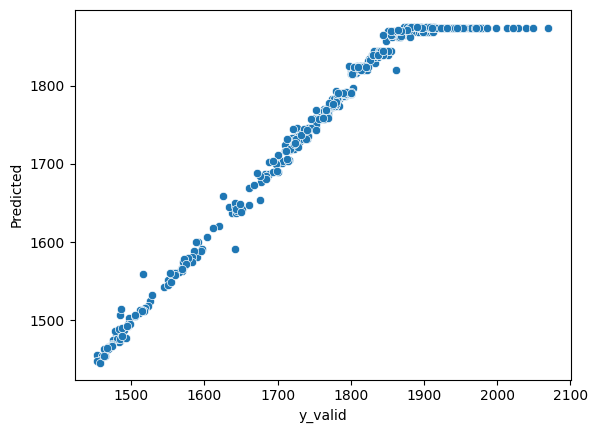

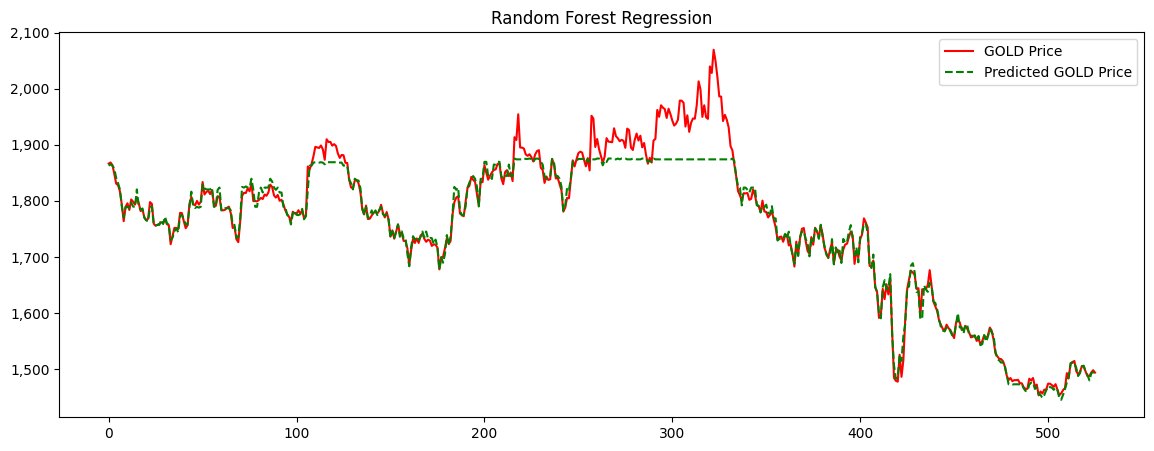

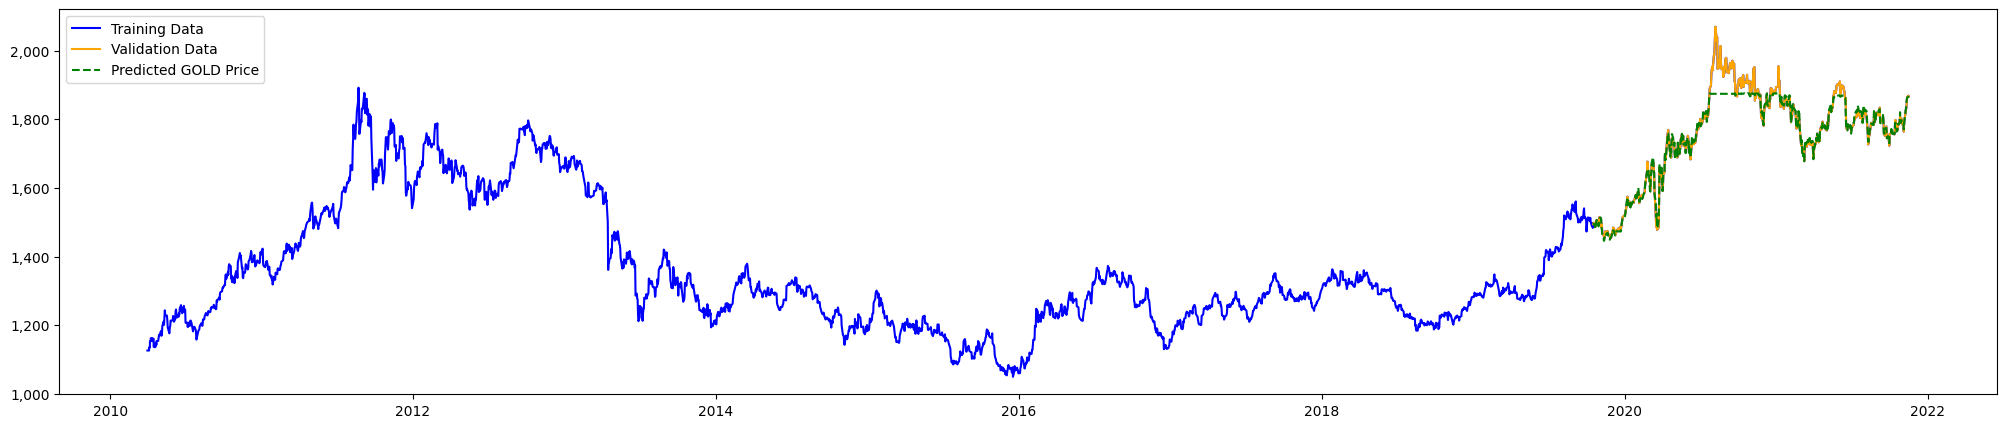

In [119]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = AUC(base_model, X_valid, y_valid, X_train, y_train)

### Evaluate the Best Random Search Model

Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 3.44373314053696
Mean Absolute Percentage Error (MAPE): 0.0016837219078721258

Test accuracy for valid set
Root Mean Square Error (RMSE): 34.34324898062042
 Mean Absolute Percentage Error (MAPE): 0.008948013789032245

R2 score: 0.9384153177817203



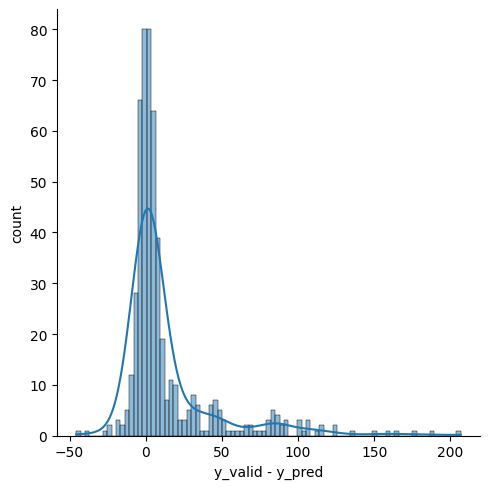

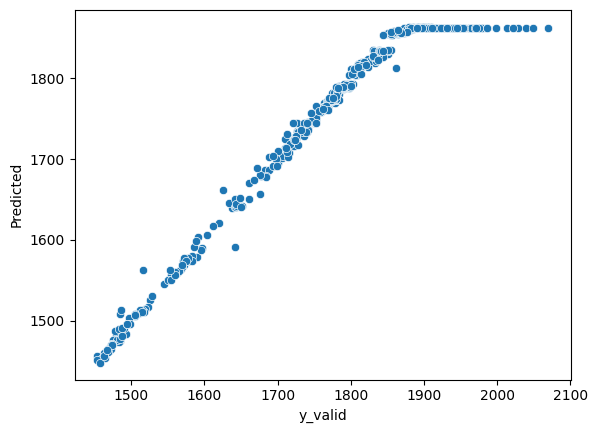

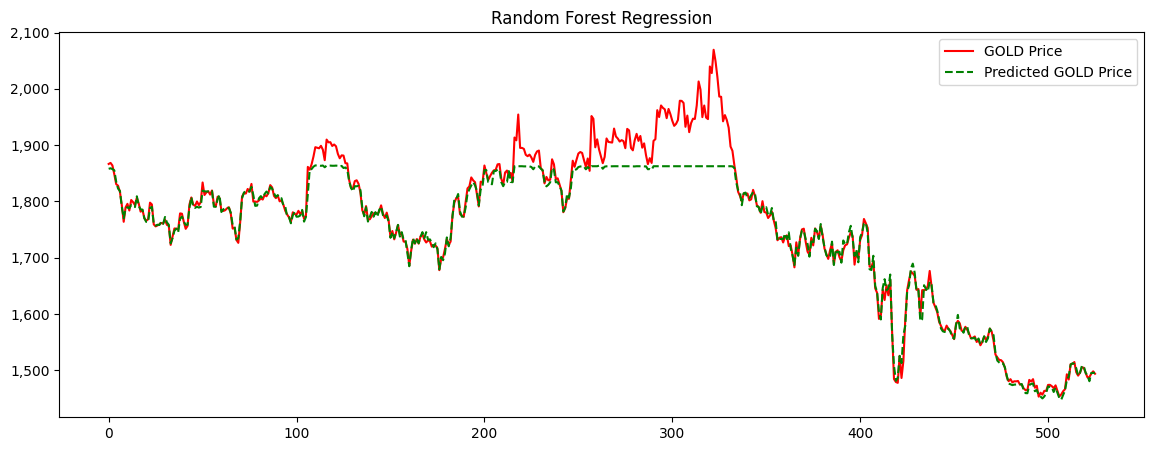

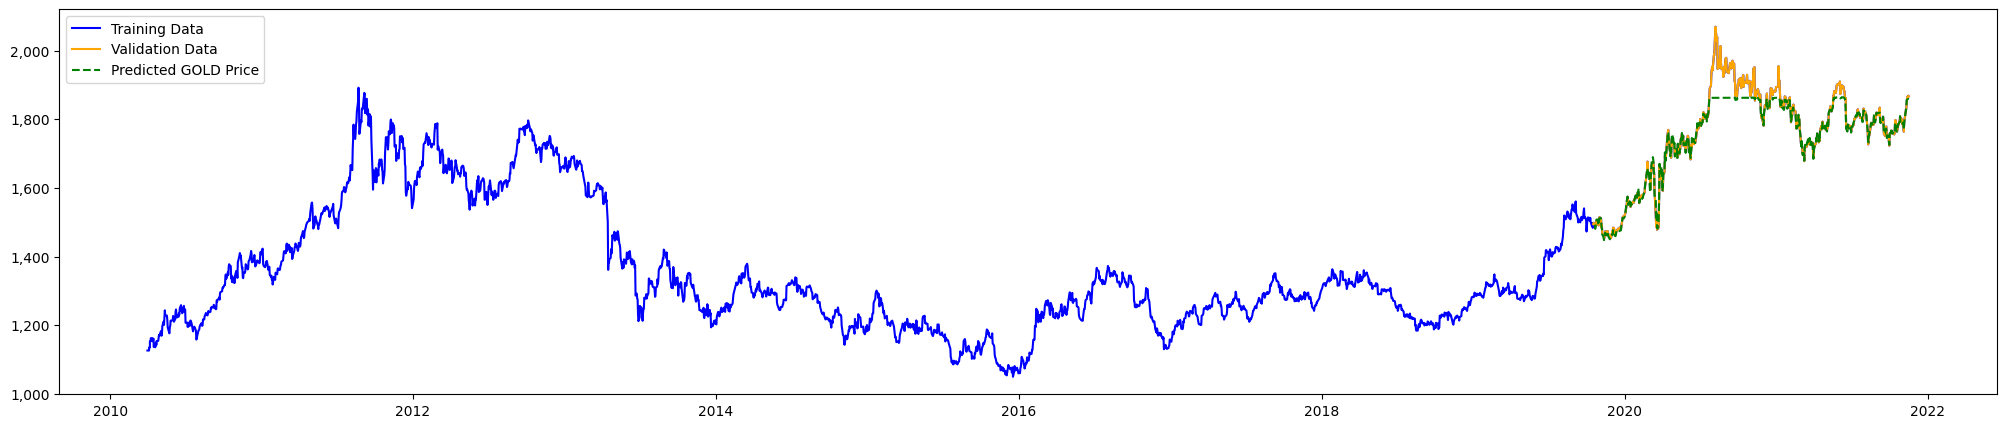

In [120]:
best_random = rf_random.best_estimator_
random_accuracy = AUC(best_random, X_valid, y_valid, X_train, y_train)

## Grid Search

We can now perform grid search building on the result from the random search. We will test a range of hyperparameters around the best values returned by random search.

In [121]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [6,8,10, None],
    'max_features': [None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 300, 400, 500]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)
tscv = TimeSeriesSplit(n_splits=3)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = tscv, n_jobs = -1, return_train_score=True)

In [122]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train);

In [123]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

#### Evaluate the Best Model from Grid Search

Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 2.0824900329634697
Mean Absolute Percentage Error (MAPE): 0.0009783540723252654

Test accuracy for valid set
Root Mean Square Error (RMSE): 33.19296308102062
 Mean Absolute Percentage Error (MAPE): 0.008762753166502891

R2 score: 0.9424716399651418



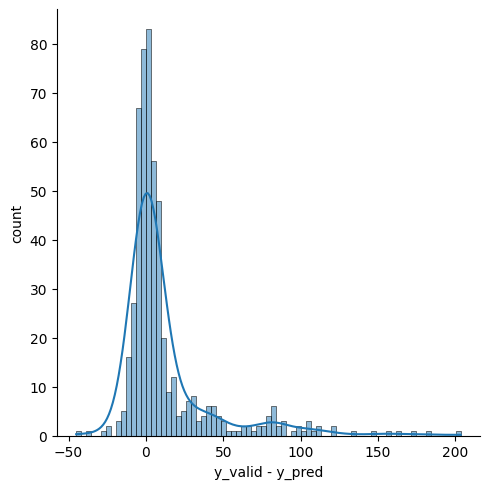

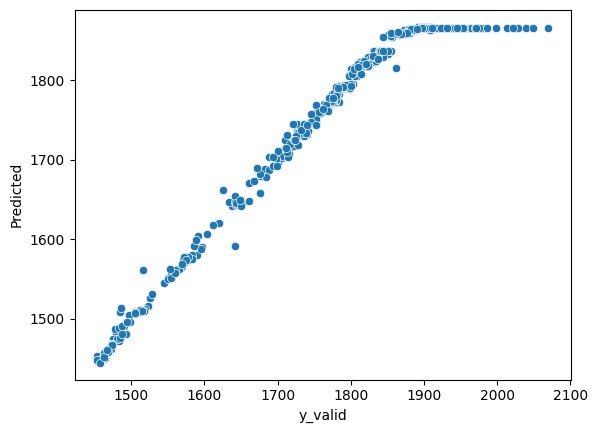

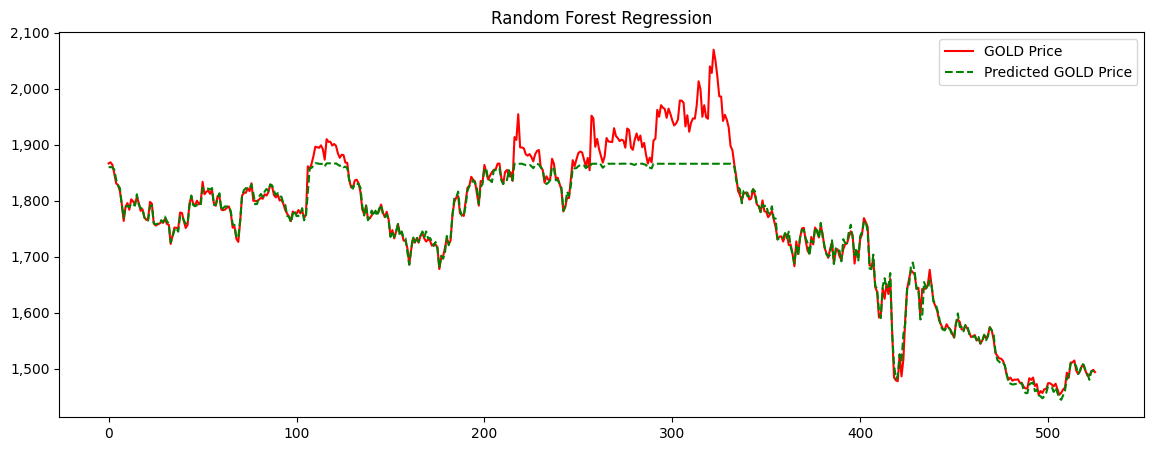

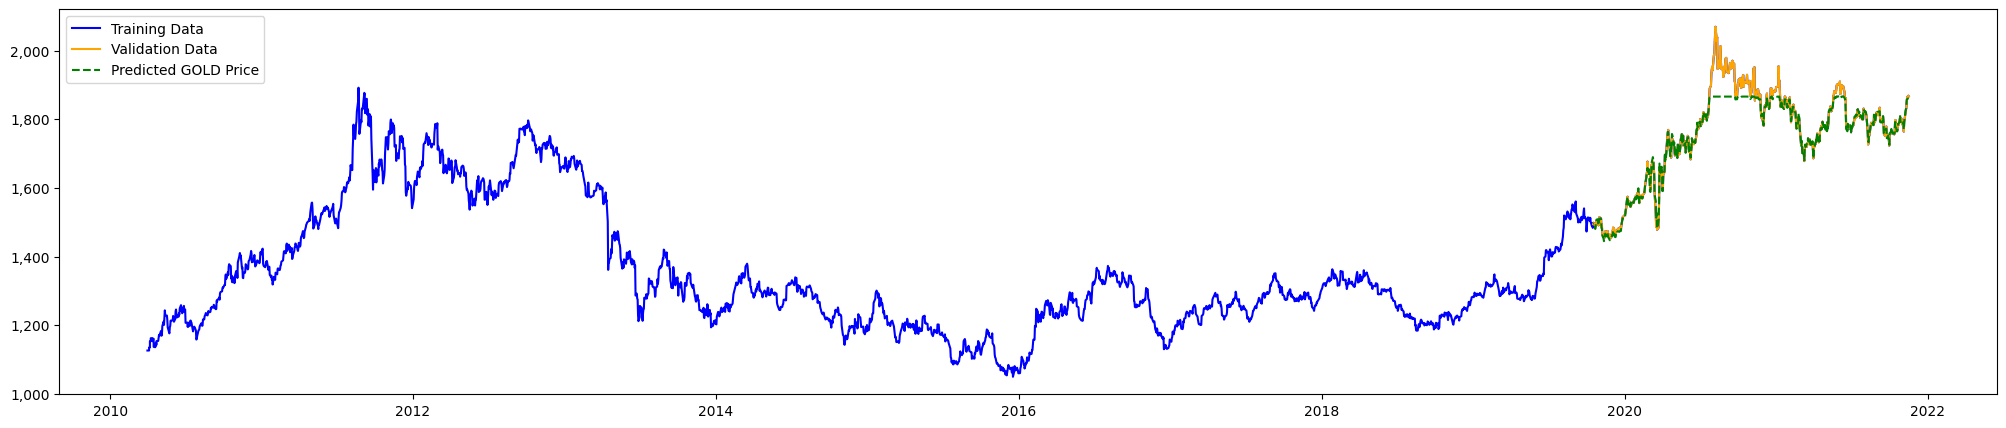

In [124]:
best_grid = grid_search.best_estimator_
grid_accuracy = AUC(best_grid, X_valid, y_valid, X_train, y_train)

## Comparison of All Improvement Techniques

In [125]:
import time

In [126]:
# Evaluate run time and prediction accuracy
def evaluate_model(model, X_train_valid, y_train_valid, X_valid, y_valid, X_test, y_test):
    n_features = X_train.shape[1]
    n_trees = model.get_params()['n_estimators']
    
    # Train and predict 10 times to evaluate time and accuracy
    predictions_test = []
    predictions_train_valid = []
    predictions_valid = []
    predictions_train = []
    run_times = []
    for _ in range(10):
        start_time = time.time()
        model.fit(X_train, y_train)
        predictions_valid.append(model.predict(X_valid))
        predictions_train.append(model.predict(X_train))
        end_time = time.time()
        run_times.append(end_time - start_time)
    for _ in range(10):
        start_time = time.time()
        model.fit(X_train_valid, y_train_valid)
        predictions_test.append(model.predict(X_test))
        predictions_train_valid.append(model.predict(X_train_valid))
        end_time = time.time()
        run_times.append(end_time - start_time)
    
    # Run time and predictions need to be averaged
    run_time = np.mean(run_times)
    predictions_test = np.mean(np.array(predictions_test), axis = 0)
    predictions_valid = np.mean(np.array(predictions_valid), axis = 0)
    predictions_train_valid = np.mean(np.array(predictions_train_valid), axis = 0)
    predictions_train = np.mean(np.array(predictions_train), axis = 0)

    print('Model Performance')
    print(30*'*')
    print("TRAIN & VALID PROCESSING")
    print("Test accuracy for train set")
    #RMSE
    rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    print("Root Mean Square Error (RMSE):", rmse_train)

    #MAPE
    mape_train = mean_absolute_percentage_error(y_train, predictions_train)
    print(" Mean Absolute Percentage Error (MAPE):", mape_train)
    print()
    
    
    print("Test accuracy for valid set")
    #RMSE
    rmse_valid = np.sqrt(mean_squared_error(y_valid, predictions_valid))
    print("Root Mean Square Error (RMSE):", rmse_valid)

    #MAPE
    mape_valid = mean_absolute_percentage_error(y_valid, predictions_valid)
    print("Mean Absolute Percentage Error (MAPE):", mape_valid)
    print()
    
    #R2
    r2_valid = r2_score(y_valid, predictions_valid)
    print("R2 score:", r2_valid)
    print()
    
    print(30*'*')
    print("TRAIN-VALID & TEST PROCESSING")
    print("Test accuracy for train_valid set")
    #RMSE
    rmse_train_valid = np.sqrt(mean_squared_error(y_train_valid, predictions_train_valid))
    print("Root Mean Square Error (RMSE):", rmse_train_valid)

    #MAPE
    mape_train_valid = mean_absolute_percentage_error(y_train_valid, predictions_train_valid)
    print("Mean Absolute Percentage Error (MAPE):", mape_train_valid)
    print()
    
    print("Test accuracy for test set")
    #RMSE
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print("Root Mean Square Error (RMSE):", rmse_test)

    #MAPE
    mape_test = mean_absolute_percentage_error(y_test, predictions_test)
    print(" Mean Absolute Percentage Error (MAPE):", mape_test)
    print()
    
    #R2
    r2_test = r2_score(y_test, predictions_test)
    print("R2 score:", r2_test)
    print()
    


    # Return results in a dictionary
    results = {'time': run_time, 'RMSE_train': rmse_train, 'RMSE_valid': rmse_valid, 'RMSE_train_valid': rmse_train_valid, 'RMSE_test': rmse_test,  'MAPE_train': mape_train, 'MAPE_valid': mape_valid, 'MAPE_train_valid': mape_train_valid, 'MAPE_test': mape_test, 'R2_valid' : r2_valid, 'R2_test' : r2_test, 'n_trees': n_trees, 'n_features': n_features}
    
    return results

In [127]:
#### Default

In [128]:
base_results = evaluate_model(base_model, X_train_valid, y_train_valid, X_valid, y_valid, X_test, y_test)

Model Performance
******************************
TRAIN & VALID PROCESSING
Test accuracy for train set
Root Mean Square Error (RMSE): 2.3530887128025024
 Mean Absolute Percentage Error (MAPE): 0.0010726643808629621

Test accuracy for valid set
Root Mean Square Error (RMSE): 30.509069426981437
Mean Absolute Percentage Error (MAPE): 0.008177067955544685

R2 score: 0.9513987017543581

******************************
TRAIN-VALID & TEST PROCESSING
Test accuracy for train_valid set
Root Mean Square Error (RMSE): 2.837204904529913
Mean Absolute Percentage Error (MAPE): 0.001148552342111854

Test accuracy for test set
Root Mean Square Error (RMSE): 11.956935988336085
 Mean Absolute Percentage Error (MAPE): 0.004612537856844509

R2 score: 0.9868642471469302



In [129]:
base_results['model'] = 'base_model'

In [130]:
base_results

{'time': 0.19970033168792725,
 'RMSE_train': 2.3530887128025024,
 'RMSE_valid': 30.509069426981437,
 'RMSE_train_valid': 2.837204904529913,
 'RMSE_test': 11.956935988336085,
 'MAPE_train': 0.0010726643808629621,
 'MAPE_valid': 0.008177067955544685,
 'MAPE_train_valid': 0.001148552342111854,
 'MAPE_test': 0.004612537856844509,
 'R2_valid': 0.9513987017543581,
 'R2_test': 0.9868642471469302,
 'n_trees': 10,
 'n_features': 14,
 'model': 'base_model'}

#### Random Search Best Model

In [131]:
random_results = evaluate_model(best_random, X_train_valid, y_train_valid, X_valid, y_valid, X_test, y_test)

Model Performance
******************************
TRAIN & VALID PROCESSING
Test accuracy for train set
Root Mean Square Error (RMSE): 3.4437331405369527
 Mean Absolute Percentage Error (MAPE): 0.0016837219078721184

Test accuracy for valid set
Root Mean Square Error (RMSE): 34.34324898062035
Mean Absolute Percentage Error (MAPE): 0.008948013789032223

R2 score: 0.9384153177817205

******************************
TRAIN-VALID & TEST PROCESSING
Test accuracy for train_valid set
Root Mean Square Error (RMSE): 3.831228815435386
Mean Absolute Percentage Error (MAPE): 0.0017340630197176222

Test accuracy for test set
Root Mean Square Error (RMSE): 9.884681110361084
 Mean Absolute Percentage Error (MAPE): 0.003829394012472621

R2 score: 0.991022808566007



In [132]:
random_results['model'] = 'best_random'

In [133]:
random_results

{'time': 12.561726796627045,
 'RMSE_train': 3.4437331405369527,
 'RMSE_valid': 34.34324898062035,
 'RMSE_train_valid': 3.831228815435386,
 'RMSE_test': 9.884681110361084,
 'MAPE_train': 0.0016837219078721184,
 'MAPE_valid': 0.008948013789032223,
 'MAPE_train_valid': 0.0017340630197176222,
 'MAPE_test': 0.003829394012472621,
 'R2_valid': 0.9384153177817205,
 'R2_test': 0.991022808566007,
 'n_trees': 900,
 'n_features': 14,
 'model': 'best_random'}

#### First Grid Search Best Model

In [134]:
first_grid_results = evaluate_model(best_grid, X_train_valid, y_train_valid, X_valid, y_valid, X_test, y_test)
first_grid_results['model'] = 'first_grid'

Model Performance
******************************
TRAIN & VALID PROCESSING
Test accuracy for train set
Root Mean Square Error (RMSE): 2.082490032963468
 Mean Absolute Percentage Error (MAPE): 0.0009783540723252676

Test accuracy for valid set
Root Mean Square Error (RMSE): 33.19296308102056
Mean Absolute Percentage Error (MAPE): 0.008762753166502877

R2 score: 0.942471639965142

******************************
TRAIN-VALID & TEST PROCESSING
Test accuracy for train_valid set
Root Mean Square Error (RMSE): 2.2819825022921436
Mean Absolute Percentage Error (MAPE): 0.0009788473649587467

Test accuracy for test set
Root Mean Square Error (RMSE): 9.829064783422103
 Mean Absolute Percentage Error (MAPE): 0.0038063814248165653

R2 score: 0.9911235450104043



In [135]:
first_grid_results

{'time': 7.901163566112518,
 'RMSE_train': 2.082490032963468,
 'RMSE_valid': 33.19296308102056,
 'RMSE_train_valid': 2.2819825022921436,
 'RMSE_test': 9.829064783422103,
 'MAPE_train': 0.0009783540723252676,
 'MAPE_valid': 0.008762753166502877,
 'MAPE_train_valid': 0.0009788473649587467,
 'MAPE_test': 0.0038063814248165653,
 'R2_valid': 0.942471639965142,
 'R2_test': 0.9911235450104043,
 'n_trees': 400,
 'n_features': 14,
 'model': 'first_grid'}

#### Second Grid Search Best Model

In [136]:
second_grid_results = evaluate_model(best_grid, X_train_valid, y_train_valid, X_valid, y_valid, X_test, y_test)
second_grid_results['model'] = 'second_grid'

Model Performance
******************************
TRAIN & VALID PROCESSING
Test accuracy for train set
Root Mean Square Error (RMSE): 2.082490032963468
 Mean Absolute Percentage Error (MAPE): 0.0009783540723252676

Test accuracy for valid set
Root Mean Square Error (RMSE): 33.19296308102056
Mean Absolute Percentage Error (MAPE): 0.008762753166502877

R2 score: 0.942471639965142

******************************
TRAIN-VALID & TEST PROCESSING
Test accuracy for train_valid set
Root Mean Square Error (RMSE): 2.2819825022921436
Mean Absolute Percentage Error (MAPE): 0.0009788473649587467

Test accuracy for test set
Root Mean Square Error (RMSE): 9.829064783422103
 Mean Absolute Percentage Error (MAPE): 0.0038063814248165653

R2 score: 0.9911235450104043



In [137]:
second_grid_results

{'time': 8.087384676933288,
 'RMSE_train': 2.082490032963468,
 'RMSE_valid': 33.19296308102056,
 'RMSE_train_valid': 2.2819825022921436,
 'RMSE_test': 9.829064783422103,
 'MAPE_train': 0.0009783540723252676,
 'MAPE_valid': 0.008762753166502877,
 'MAPE_train_valid': 0.0009788473649587467,
 'MAPE_test': 0.0038063814248165653,
 'R2_valid': 0.942471639965142,
 'R2_test': 0.9911235450104043,
 'n_trees': 400,
 'n_features': 14,
 'model': 'second_grid'}

## Comparison

In [138]:
comparison = {
    'RMSE_train_valid': [],
    'RMSE_valid': [],
    'RMSE_train': [],
    'RMSE_test': [],
    'MAPE_train_valid': [],
    'MAPE_valid': [],
    'MAPE_test': [],
    'MAPE_train': [],
    'R2_valid' : [],
    'R2_test' : [],
    'model': [],
    'n_features': [],
    'n_trees': [],
    'time': []}
for model in [base_results, random_results, first_grid_results, second_grid_results]:
    comparison['RMSE_train_valid'].append(round(model['RMSE_train_valid'], 3))
    comparison['RMSE_valid'].append(round(model['RMSE_valid'], 3))
    comparison['RMSE_train'].append(round(model['RMSE_train'], 3))
    comparison['RMSE_test'].append(round(model['RMSE_test'], 3))
    comparison['MAPE_train_valid'].append(round(model['MAPE_train_valid'], 3))
    comparison['MAPE_valid'].append(round(model['MAPE_valid'], 3))
    comparison['MAPE_train'].append(round(model['MAPE_train'], 3))
    comparison['MAPE_test'].append(round(model['MAPE_test'], 3))
    comparison['R2_test'].append(round(model['R2_test'], 3))
    comparison['R2_valid'].append(round(model['R2_valid'], 3))
    comparison['model'].append(model['model'])
    comparison['n_features'].append(model['n_features'])
    comparison['n_trees'].append(int(model['n_trees']))
    comparison['time'].append(round(model['time'], 4))


In [139]:
comparison = pd.DataFrame.from_dict(comparison, orient = 'columns')

In [140]:
comparison[['model','RMSE_train', 'RMSE_valid', 'RMSE_train_valid','RMSE_test', 'MAPE_train', 'MAPE_valid', 'MAPE_train_valid', 'MAPE_test', 'R2_valid', 'R2_test', 'n_features', 'n_trees', 'time']]


,model,RMSE_train,RMSE_valid,RMSE_train_valid,RMSE_test,MAPE_train,MAPE_valid,MAPE_train_valid,MAPE_test,R2_valid,R2_test,n_features,n_trees,time
0,base_model,2.353,30.509,2.837,11.957,0.001,0.008,0.001,0.005,0.951,0.987,14,10,0.1997
1,best_random,3.444,34.343,3.831,9.885,0.002,0.009,0.002,0.004,0.938,0.991,14,900,12.5617
2,first_grid,2.082,33.193,2.282,9.829,0.001,0.009,0.001,0.004,0.942,0.991,14,400,7.9012
3,second_grid,2.082,33.193,2.282,9.829,0.001,0.009,0.001,0.004,0.942,0.991,14,400,8.0874


## Plotting 

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')

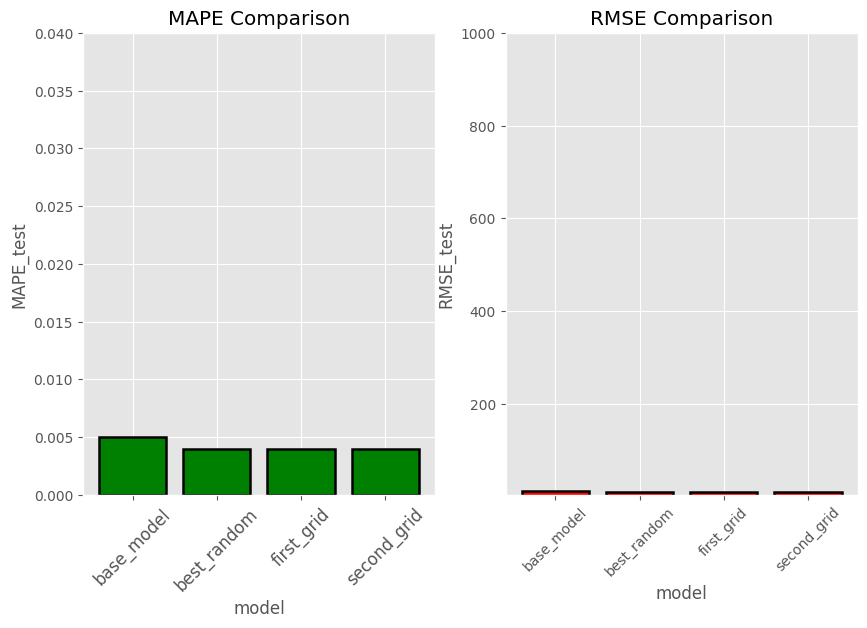

In [142]:
xvalues = list(range(len(comparison)))
plt.subplots(1, 2, figsize=(10, 6))
plt.subplot(121)
plt.bar(xvalues, comparison['MAPE_test'], color = 'g', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['model'], rotation = 45, fontsize = 12)
plt.ylim(ymin = 0, ymax = 0.04)
plt.xlabel('model'); plt.ylabel('MAPE_test'); plt.title('MAPE Comparison');

plt.subplot(122)
plt.bar(xvalues, comparison['RMSE_test'], color = 'r', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['model'], rotation = 45)
plt.ylim(ymin = 3.5, ymax = 1000)
plt.xlabel('model'); plt.ylabel('RMSE_test'); plt.title('RMSE Comparison');
plt.show();

## Final Model & Evaluation

Final Model Parameters:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 2.2819825022921405
Mean Absolute Percentage Error (MAPE): 0.0009788473649587465

Test accuracy for test set
Root Mean Square Error (RMSE): 9.829064783422089
 Mean Absolute Percentage Error (MAPE): 0.0038063814248165567

R2 score: 0.9911235450104043



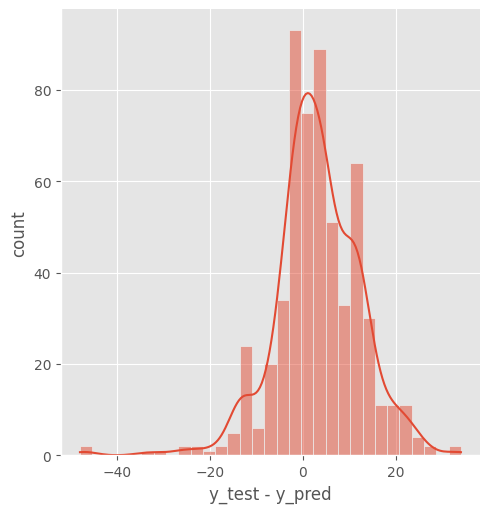

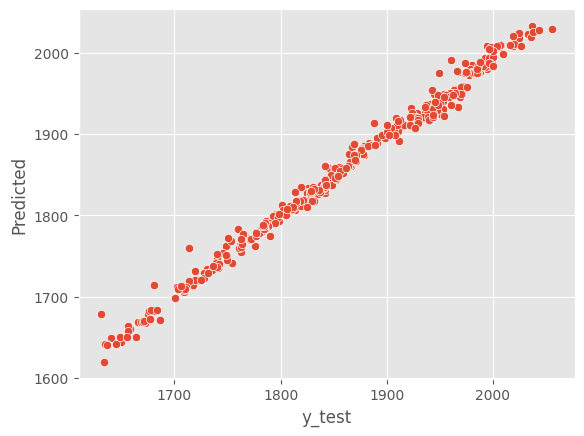

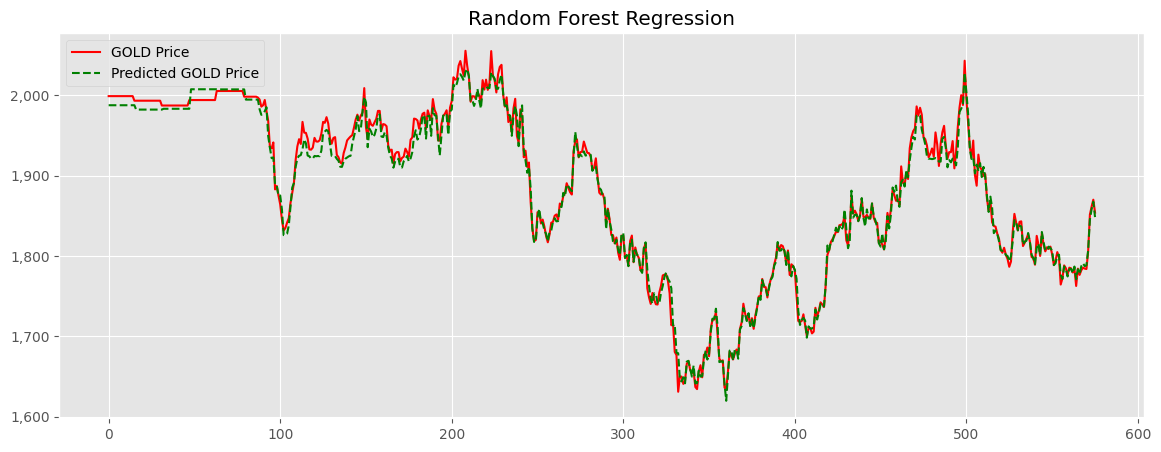

In [143]:
final_model = grid_search.best_estimator_

print('Final Model Parameters:\n')
pprint(final_model.get_params())
print('\n')
grid_final_accuracy = ACC(final_model, X_test, y_test, X_train_valid, y_train_valid)

## Importance Feature

In [144]:
features = X_train.columns
# Get numerical feature importances
importances = list(final_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(features, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: GOLD_open            Importance: 0.9142
Variable: GOLD_high            Importance: 0.0852
Variable: GOLD_low             Importance: 0.0003
Variable: copper               Importance: 0.0
Variable: crude_oil            Importance: 0.0
Variable: DXY                  Importance: 0.0
Variable: EURUSD               Importance: 0.0
Variable: MSCI                 Importance: 0.0
Variable: NASDAQ               Importance: 0.0
Variable: NLR                  Importance: 0.0
Variable: RUT                  Importance: 0.0
Variable: silver               Importance: 0.0
Variable: SP500                Importance: 0.0
Variable: VIX                  Importance: 0.0


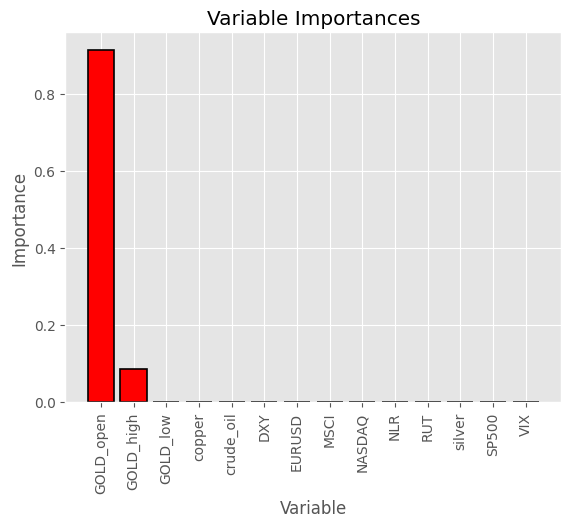

In [145]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

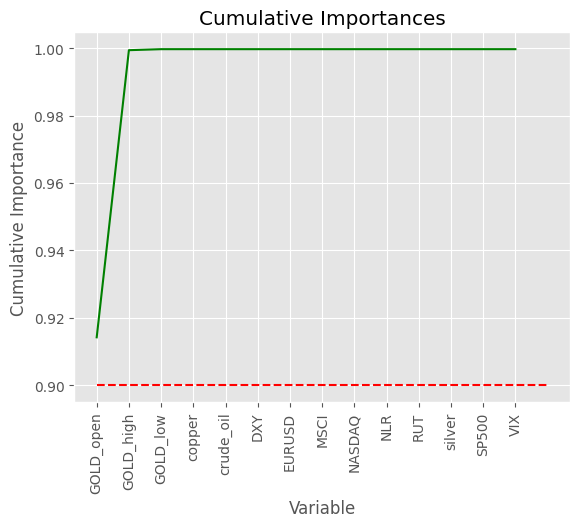

In [146]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 90% of importance retained
plt.hlines(y = 0.9, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [147]:
# Find number of features for cumulative importance of 90%
# Add 1 because Python is zero-indexed
num = np.where(cumulative_importances > 0.9)[0][0] + 1
print('Number of features for 90% importance:', num)

Number of features for 90% importance: 1


In [148]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:num]]
print(important_feature_names)

['GOLD_open']


In [149]:
# Use sklearn to export the tree 
from sklearn.tree import export_graphviz

# Write the decision tree as a dot file
visual_tree = final_model.estimators_[12]
export_graphviz(visual_tree, out_file = '/Users/ibulmnie/Documents/GitHub/GoldPricePrediction-1/model/linh/image/best_tree.dot', feature_names = X_train.columns, 
                precision = 2, filled = True, rounded = True, max_depth = None)

In [150]:
# Use pydot for converting to an image file
import pydot

# Import the dot file to a graph and then convert to a png
(graph, ) = pydot.graph_from_dot_file('/Users/ibulmnie/Documents/GitHub/GoldPricePrediction-1/model/linh/image/best_tree.dot')
graph.write_png('/Users/ibulmnie/Documents/GitHub/GoldPricePrediction-1/model/linh/image/best_tree.png')